In [1]:
from oanda_backtest import Backtest

In [2]:
from utils.packages import *
from utils.tools import *
%matplotlib inline

In [3]:
temp_file = 'config/access_keys.yaml'
with open(temp_file) as temp_file:
    config = yaml.load(temp_file)

In [4]:
access_token = config['oanda_demo_account']['token']
accountID = config['oanda_demo_account']['account_id']

In [5]:
bt = Backtest(access_token=access_token, environment='practice')

In [9]:
bt.candles("EUR_USD")
fast_ma = bt.sma(period=50)
slow_ma = bt.sma(period=250)

In [10]:
bt.sell_exit = bt.buy_entry = (fast_ma > slow_ma) & (fast_ma.shift() <= slow_ma.shift())
bt.buy_exit = bt.sell_entry = (fast_ma < slow_ma) & (fast_ma.shift() >= slow_ma.shift())

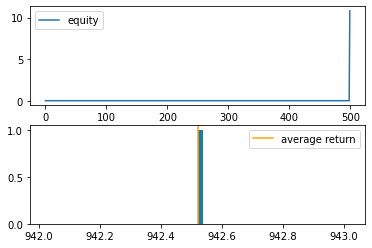

In [11]:
bt.run()
bt.plot()

# Advanced

total profit         974.000
total trades         170.000
win rate              37.059
profit factor          1.094
maximum drawdown    5100.000
recovery factor        0.191
riskreward ratio       1.876
sharpe ratio           0.026
average return         5.373
stop loss              5.000
take profit            5.000
dtype: float64


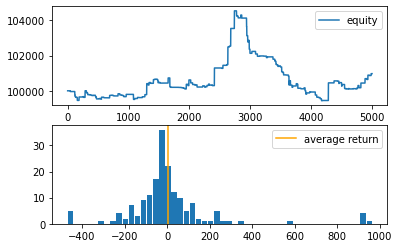

In [21]:
filepath='usd-jpy-h1.csv'
if bt.exists(filepath):
    bt.read_csv(filepath)
else:
    params = {
        "granularity": "H1",  # 1 hour candlesticks (default=S5)
        "count": 100 # 5000 candlesticks (default=500, maximum=5000)
    }
    bt.candles("USD_JPY", params)
    bt.to_csv(filepath)

fast_ma = bt.sma(period=10)
slow_ma = bt.sma(period=30)
exit_ma = bt.sma(period=5)

bt.buy_entry = (fast_ma > slow_ma) & (fast_ma.shift() <= slow_ma.shift())
bt.sell_entry = (fast_ma < slow_ma) & (fast_ma.shift() >= slow_ma.shift())
bt.buy_exit = (bt.C < exit_ma) & (bt.C.shift() >= exit_ma.shift())
bt.sell_exit = (bt.C > exit_ma) & (bt.C.shift() <= exit_ma.shift())

bt.initial_deposit = 100000 # default=0
bt.units = 1000 # currency unit (default=10000)
bt.stop_loss = 50 # stop loss pips (default=0)
bt.take_profit = 100 # take profit pips (default=0)

print(bt.run())
bt.plot("backtest.png")